In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Dataset_Superstore.csv')

# Data Understanding:

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
#Converting the date field in object datatype to date datatype
#
df['Order Date'] =  pd.to_datetime(df['Order Date'])

In [8]:
#Checking for null values in dataset
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df[['Category']].nunique()

Category    3
dtype: int64

In [10]:
df[['Category']].value_counts()

Category       
Office Supplies    6026
Furniture          2121
Technology         1847
dtype: int64

In [11]:
# Forcasting for 'Office Supplies' sales

In [12]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [13]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 2014-01-03 00:00:00
Ending date: 2017-12-30 00:00:00



We have a four year of Office Supplies data

# Data Processing

In [14]:
#Removing irrelvant variables
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 
        'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']

OS.drop(cols, axis=1, inplace= True)
OS

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [15]:
OS1= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
#OS= OS.set_index('Order Date')
OS.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [16]:
#OS['Order Date'] = pd.to_datetime(df['Order Date'])
#OS= OS.set_index('Order Date')
OS

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


# EDA

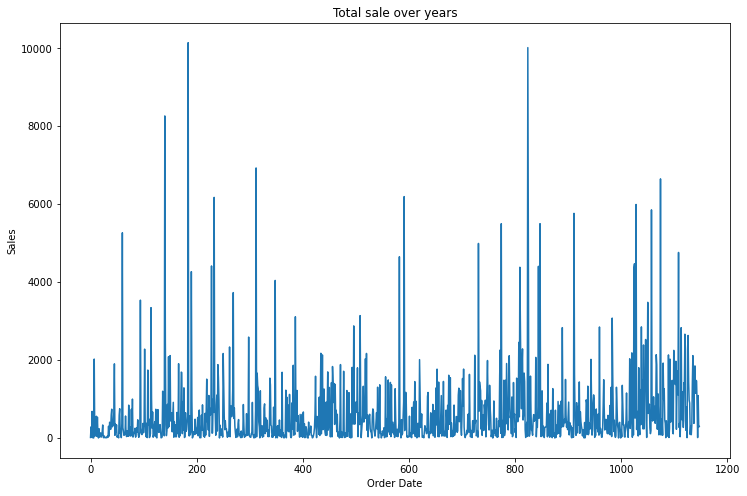

In [17]:
OS1['Sales'].plot(figsize=(12,8 ))
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
#figure(figsize=(10, 5), dpi=80)
plt.show()

Text(0.5, 1.0, 'Sales Distirbution Graph')

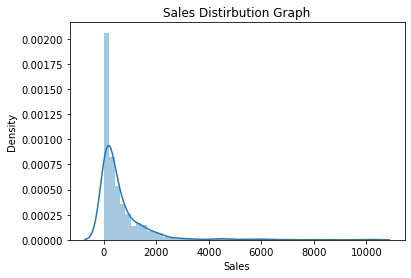

In [18]:
sns.distplot(OS1['Sales'])
plt.title("Sales Distirbution Graph")

# Feature Engineerng:

In [19]:
OS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1148 non-null   datetime64[ns]
 1   Sales       1148 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.1 KB


In [20]:
#Converting the date field in object datatype to date datatype
OS1['Order Date'] =  pd.to_datetime(OS1['Order Date'])

In [21]:
OS1['month'] = OS1['Order Date'].dt.month
OS1['year'] = OS1['Order Date'].dt.year
OS1['dayofweek'] = OS1['Order Date'].dt.dayofweek
OS1['daysinmonth'] = OS1['Order Date'].dt.day
OS1['quarter'] = OS1['Order Date'].dt.quarter

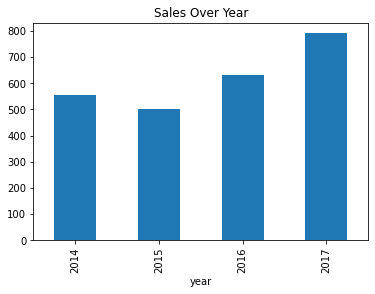

In [22]:
OS1.groupby(['year'])['Sales'].mean().plot(kind='bar')
plt.title("Sales Over Year")

rcParams['figure.figsize'] = 10, 5

There is an increase in the sale in the year of 2016 and 2017

Text(0.5, 1.0, 'Sales Over Month')

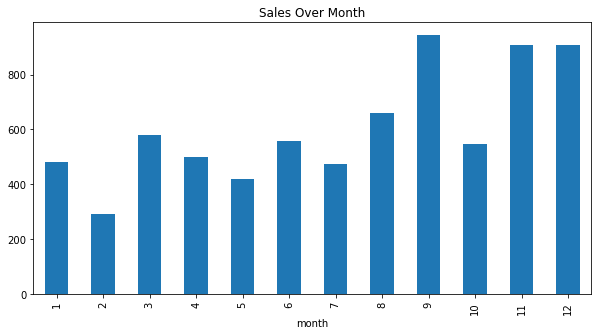

In [23]:
OS1.groupby(['month'])['Sales'].mean().plot(kind='bar')
plt.title("Sales Over Month")

Sales is increased in the end of the year

Text(0.5, 1.0, 'Sales Over dayofWeek')

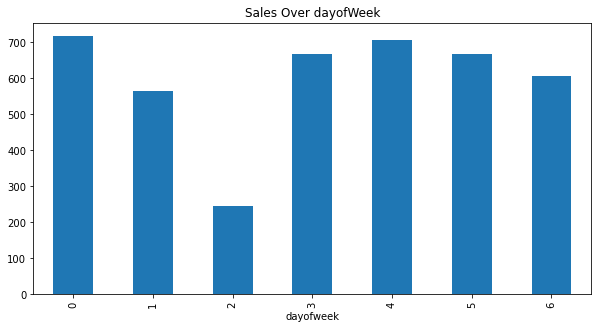

In [24]:
OS1.groupby(['dayofweek'])['Sales'].mean().plot(kind='bar')
plt.title("Sales Over dayofWeek")

Sales are same on all days except on tuesdays

Text(0.5, 1.0, 'Sales Over Daysinmonth')

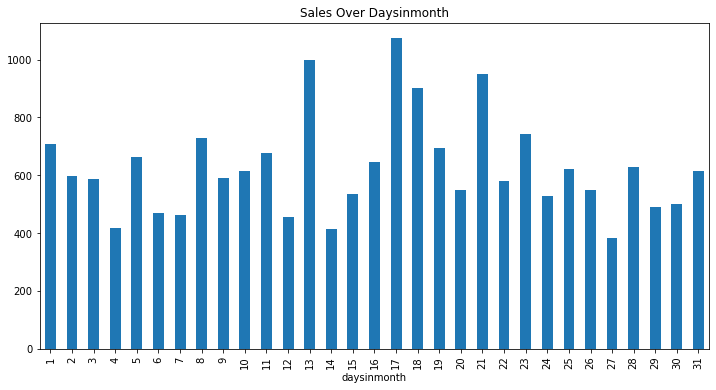

In [25]:
OS1.groupby(['daysinmonth'])['Sales'].mean().plot(kind='bar',figsize=(12,6))
plt.title("Sales Over Daysinmonth")

Text(0.5, 1.0, 'Sales Over the quater')

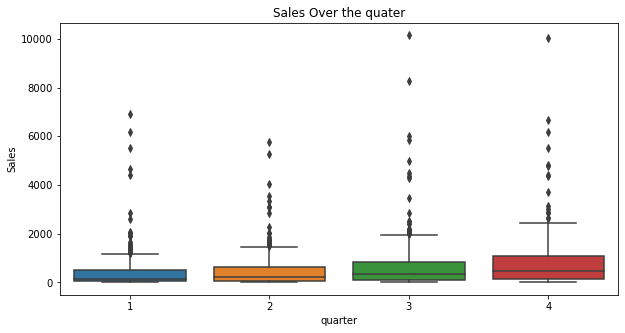

In [26]:
sns.boxplot(x=OS1['quarter'],y=OS1['Sales'])
plt.title("Sales Over the quater")

In [27]:
OS['Order Date'] = pd.to_datetime(df['Order Date'])
OS
OS= OS.set_index('Order Date')
OS.head()

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430


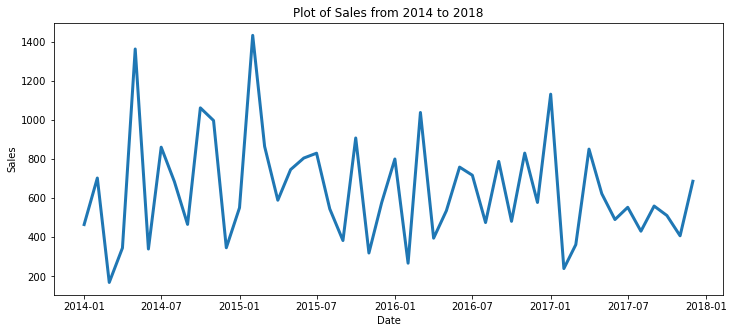

In [85]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Plot of Sales from 2014 to 2018")


from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

Inference: Sales are always low in the beginning of the year and high at end of the year. 
    there is an  upward trend within a single year

# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

In [29]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017], dtype=int64)

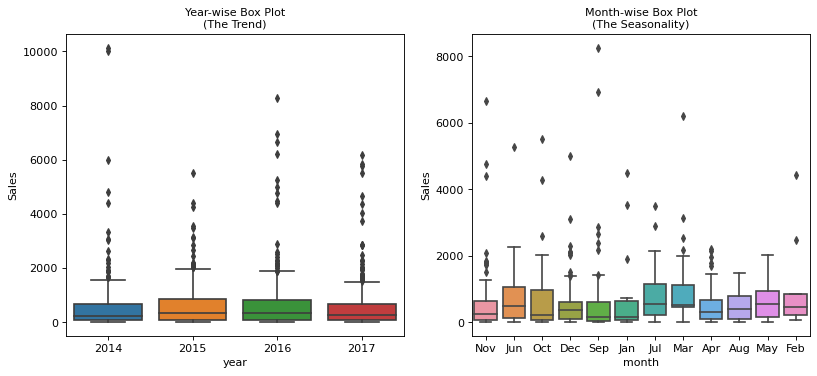

In [30]:

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi= 80)

sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=10); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=10)
plt.show()

# TimeSeries Decomposition :

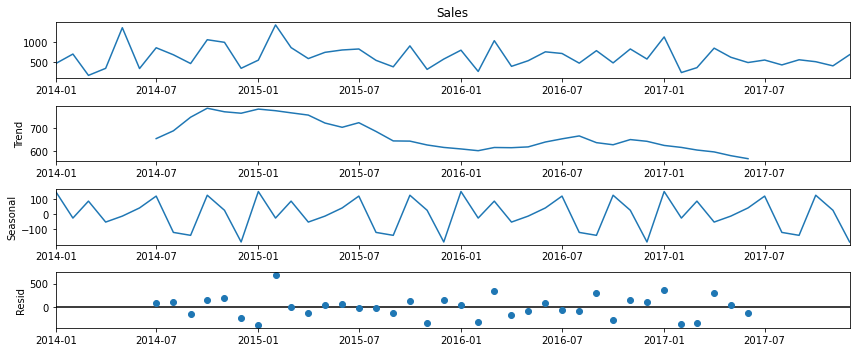

In [31]:

import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

The plots show the data is seasonality

# Rolling Statistics Plot

In [32]:
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

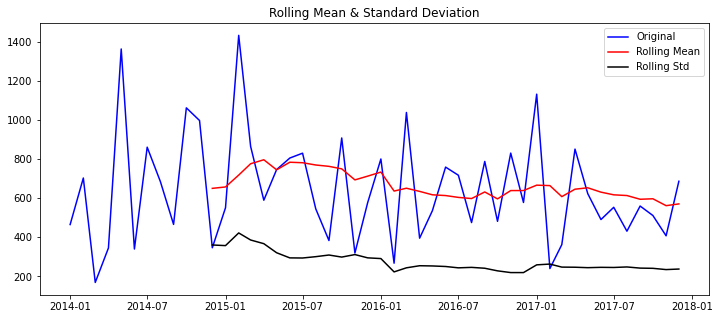

In [33]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Performing Dicky Fuller Test

In [34]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series,autolag = 'AIC')
    print("1. ADF : ",result[0])
    print("2. P-Value : ", result[1])
    print("3. Num Of Lags : ", result[2])
    print("4. Num Of Observations Used For ADF Regression:",result[3])
    print("5. Critical Values :")
    for key, val in result[4].items():
         print("\t",key, ": ", val)
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
    print(result)

In [35]:
adf_test(monthly_OS)

1. ADF :  -1.6302377773495833
2. P-Value :  0.4673662535108267
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 43
5. Critical Values :
	 1% :  -3.5925042342183704
	 5% :  -2.931549768951162
	 10% :  -2.60406594375338
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
(-1.6302377773495833, 0.4673662535108267, 4, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 513.6724128880873)


# Coversion to Stationary Time Series 

In [36]:
do= pd.read_csv('Dataset_Superstore.csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [37]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [38]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [39]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()

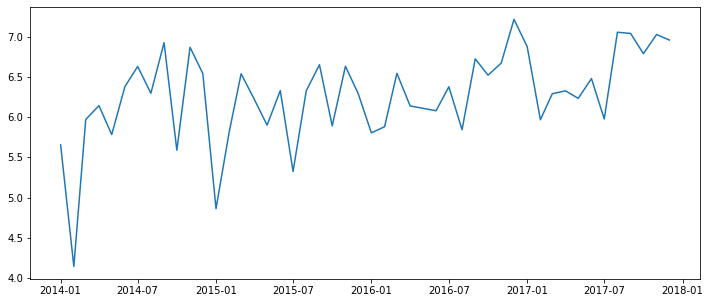

In [40]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

In this case, we can see the plot is not a forward trend in the data. 
So, take a log transform is not a solution to make a time-series stationary

# Moving Average:

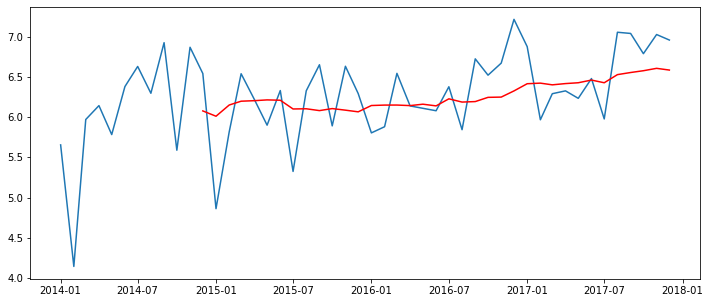

In [41]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean.
Lets subtract this from the original series.
Note that since we are taking average of last 12 values, 
rolling mean is not defined for first 11 values. This can be observed as:

In [42]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

In [43]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

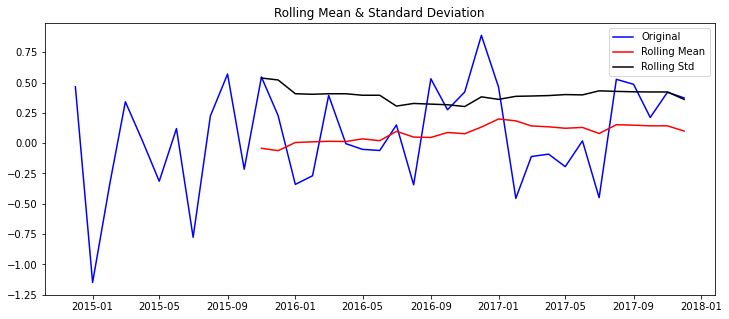

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [44]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Exponentially weighted moving average:

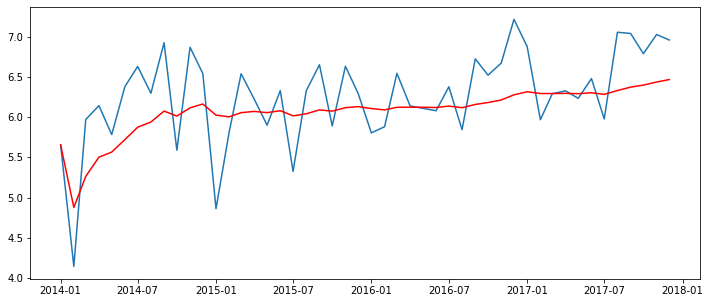

In [45]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

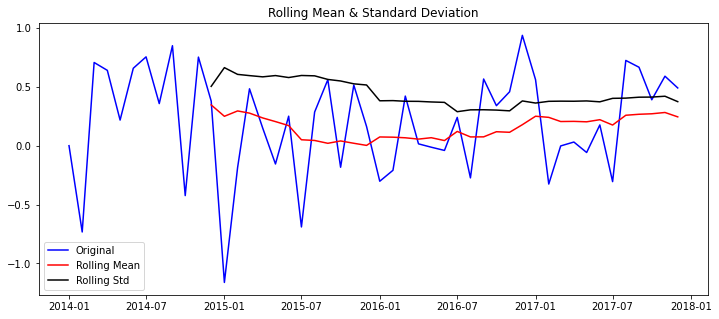

Results of Dickey-Fuller Test:
Test Statistic                 -2.967356
p-value                         0.038057
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [46]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Differencing:

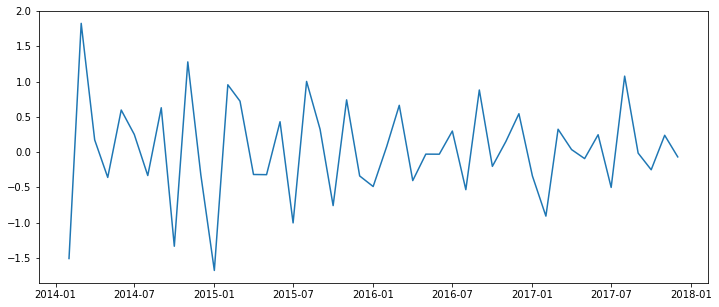

In [47]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

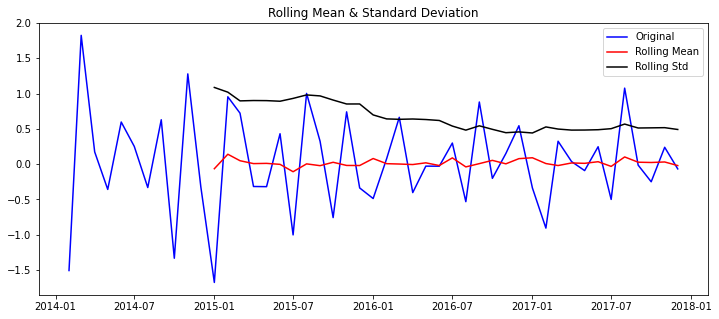

Results of Dickey-Fuller Test:
Test Statistic                 -4.771865
p-value                         0.000062
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [48]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposing:

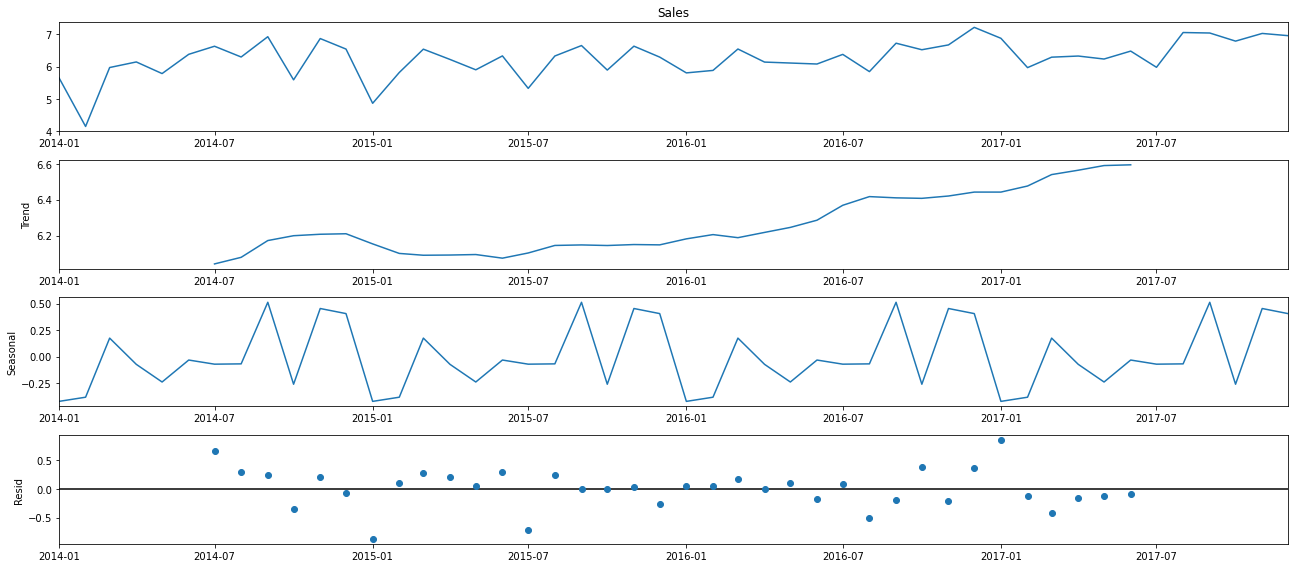

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

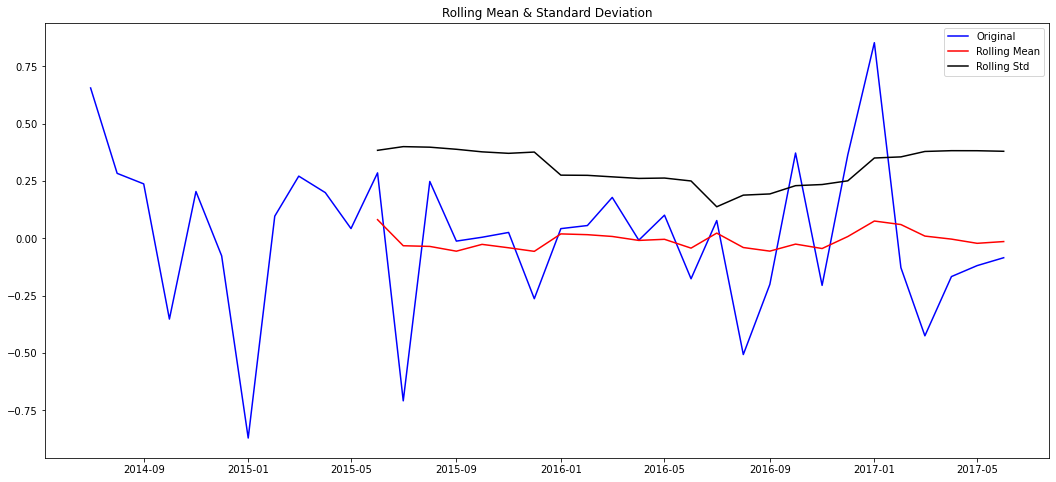

Results of Dickey-Fuller Test:
Test Statistic                 -4.901459
p-value                         0.000035
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Now TimeSeries is very close to Stationary

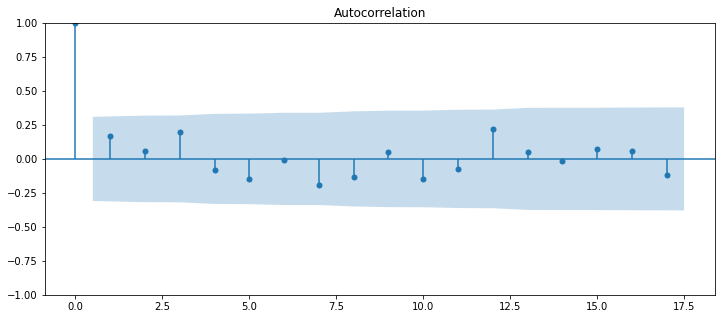

In [86]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf = plot_acf(train.dropna())

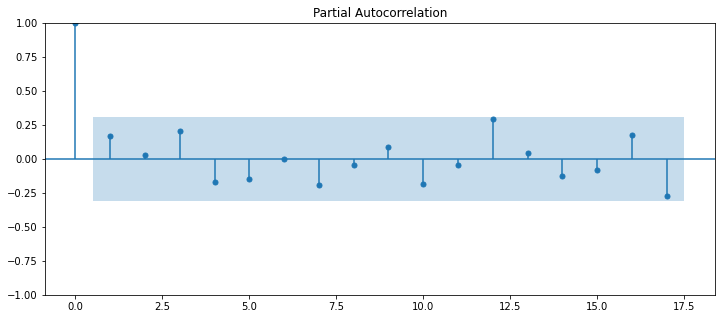

In [88]:
result = plot_pacf(train.dropna())

# Time Series Forecasting with ARIMA 

In [51]:
#Train Test Split: 
train= y[:40]
test= y[40:]

import pmdarima

from pmdarima import auto_arima

Hyperparameters of ARIMA model p,d,q using auto_arima 

In [52]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.13 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.208 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=668.754, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=669.659, Time=0.13 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.430 second

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

# Build ARIMA model: 

In [54]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Wed, 14 Dec 2022   AIC                            552.176
Time:                        17:57:05   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
#Predict Test:

pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236657
2017-06-01    616.500456
2017-07-01    617.534871
2017-08-01    617.682179
2017-09-01    617.703156
2017-10-01    617.706144
2017-11-01    617.706569
2017-12-01    617.706630
Freq: MS, Name: predicted_mean, dtype: float64

In [56]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.363205


<AxesSubplot:xlabel='Order Date'>

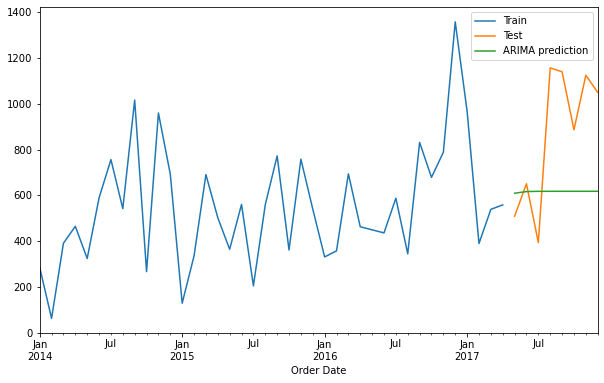

In [57]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

The problem of ARIMA prediction is it doesnt show the season trend of data.
The solution for this problem is using Seasonal ARIMA called SARIMAX function!

# FORECAST DATA USING SARIMAX model:

In [58]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Wed, 14 Dec 2022   AIC                            388.486
Time:                                    17:57:06   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.838      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.306      0.760      -1.255       1.718
ma.S.L12      -0.9973      0.465     -2.144      0.032      -1.909      -0.086
sigma2      4.793e+04    9.8e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.91e+25. Standard errors may be unstable.
"""

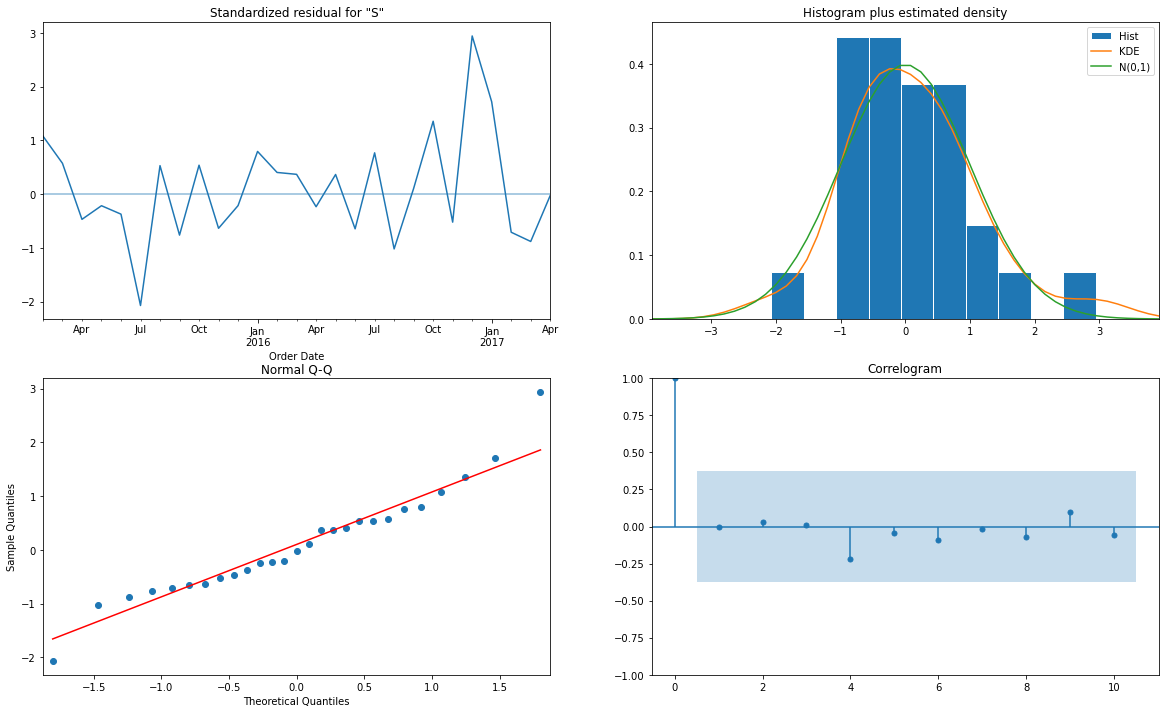

In [82]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()

In [59]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.233200
2017-06-01     636.970368
2017-07-01     686.334428
2017-08-01     583.593330
2017-09-01     997.198693
2017-10-01     638.852450
2017-11-01     957.396141
2017-12-01    1119.299078
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

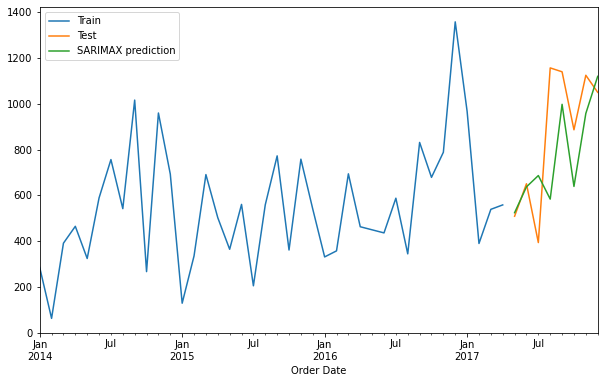

In [60]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [61]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.238378


# Visualising Forecast

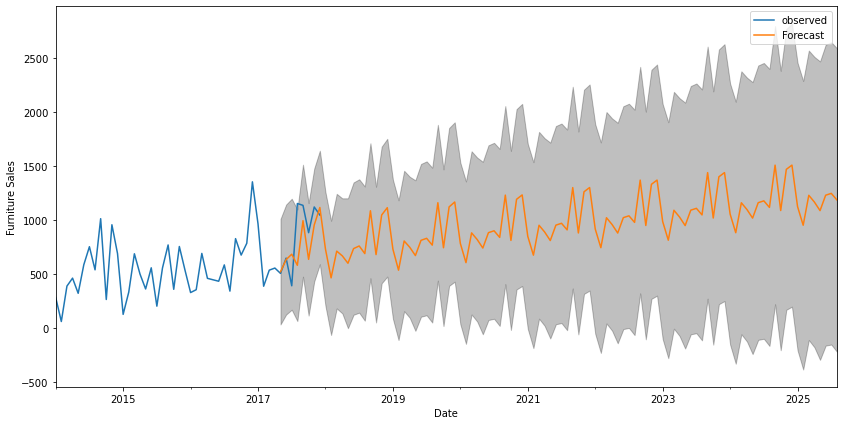

In [83]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Time Series of Furniture vs. Office Supplies

In [62]:
# Comparing the model with other categories. SO now we have office Supliers and furniture

Office_Supplies= df.loc[df['Category']=='Office Supplies']
furniture= df.loc[df['Category']=='Furniture']


In [63]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


Office_Supplies.drop(cols, axis=1, inplace= True)
furniture.drop(cols, axis=1, inplace= True)


In [64]:
Office_Supplies= Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [65]:
furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [66]:
Office_Supplies['Order Date'] = pd.to_datetime(df['Order Date'])
Office_Supplies= Office_Supplies.set_index('Order Date')
Office_Supplies

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


In [67]:
furniture['Order Date'] = pd.to_datetime(df['Order Date'])
furniture= furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2016-11-08,2573.8200
2016-11-08,76.7280
2016-06-12,51.9400
2015-10-11,9.9400
2015-10-11,879.9390
...,...
2014-04-29,1393.4940
2015-04-25,832.4540
2017-06-26,551.2568


In [68]:
y_furniture = furniture['Sales'].resample('MS').mean()

In [69]:
y_Office_Supplies = Office_Supplies['Sales'].resample('MS').mean()

In [70]:
furniture = pd.DataFrame({'Order Date' : y_furniture.index,'Sales' : y_furniture.values})
Office_Supplies = pd.DataFrame({'Order Date' : y_Office_Supplies.index,'Sales' : y_Office_Supplies.values})                                                              

In [71]:
store=furniture.merge(Office_Supplies,how='inner',on='Order Date')

In [72]:
store.head()

,Order Date,Sales_x,Sales_y
0,2014-01-01,598.882769,465.195522
1,2014-02-01,233.323333,703.377333
2,2014-03-01,1233.789000,168.809556
3,2014-04-01,691.422937,345.347750
4,2014-05-01,1215.692400,1363.929625


In [73]:
store.rename(columns={'Sales_x':'furniture_sales','Sales_y':'Office_Supplies_sales'},inplace=True)

In [74]:
store.head()

,Order Date,furniture_sales,Office_Supplies_sales
0,2014-01-01,598.882769,465.195522
1,2014-02-01,233.323333,703.377333
2,2014-03-01,1233.789000,168.809556
3,2014-04-01,691.422937,345.347750
4,2014-05-01,1215.692400,1363.929625


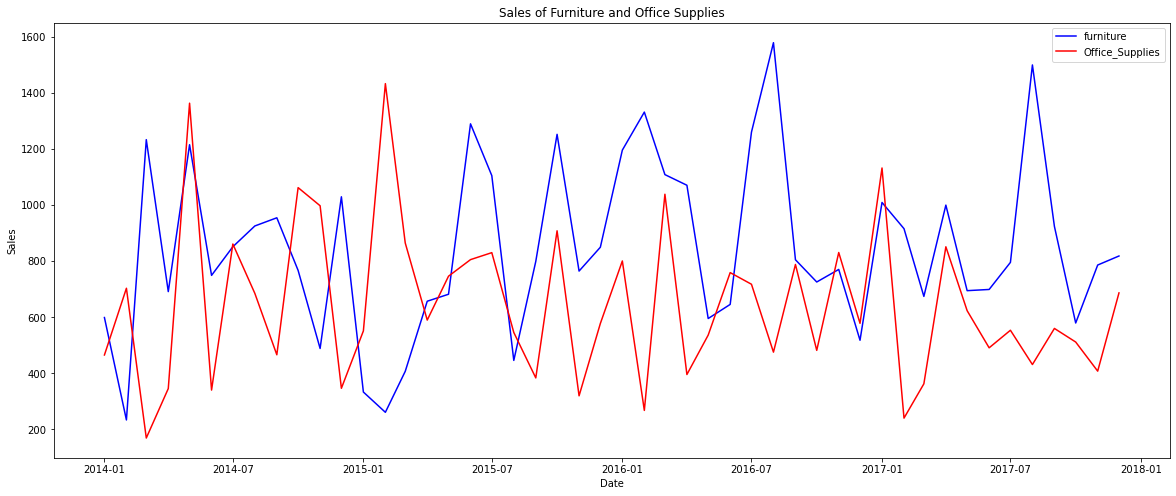

In [75]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label='furniture')
plt.plot(store['Order Date'],store['Office_Supplies_sales'],'r-',label='Office_Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Sales of Furniture and Office Supplies")
plt.legend()

Observation :Sales of furniture and office supplies shared a similar seasonal pattern
    Early of the year is the off season for both of the two categories

Time series analysis and modeling is a very popular technique in mathematics and statistics used to explore the hidden details in time dependent data. ARIMA and SARIMA modeling is one of the basic time series methods employed in practice. 
In this study, we examined the categories sales in Superstore and tried to forecast the future sale 
After exploratory data Analysis we found the data to have seasonal patterns which led us to use seasonal time series model.
.As noted, ARIMA (ARMA) modeling fails to effectively capture the process being followed and subsequent forecasting chosen observations for validation. An application of an alternative modeling technique (SARIMA) is used be to analyze as the series shows seasonality and turn out to be of significant analysis due to the fact that it provides an improved budget preparation and performance management and also provides customer satisfaction.
